In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
data_csv = pd.read_csv('weight-height.csv')
Gender = np.array([])
Height = np.array([])
Weight = np.array([])
for index, row in data_csv.iterrows():
    for columm_name, value in row.items(): 
        if columm_name == 'Gender':
            Gender = np.append(Gender, value)
        if columm_name == 'Height':
            Height = np.append(Height, value * 2.54)
        if columm_name == 'Weight':
            Weight = np.append(Weight, value * 0.45359237)
Head = 5
print(Gender[:Head])
print(Height[:Head])
print(Weight[:Head])

['Male' 'Male' 'Male' 'Male' 'Male']
[187.57142322 174.70603628 188.2396677  182.19668514 177.49976149]
[109.72107461  73.62279191  96.49762887  99.80958561  93.59869511]


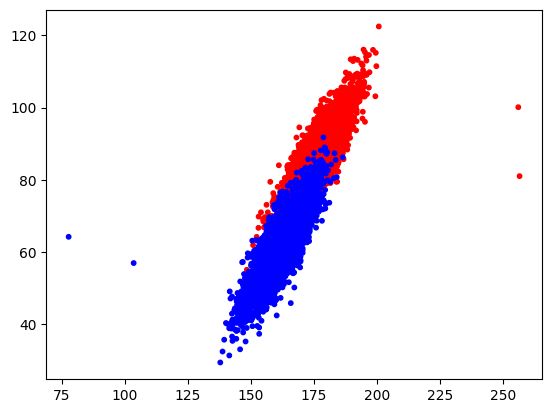

In [59]:
colors = []
for i in Gender:
    if i == 'Male':
        colors.append('r')
    else:
        colors.append('b')
plt.scatter(Height, Weight, 10, c = colors)
plt.show()

W1 :  1.3440958343319354
W0 :  -153.3519860587032


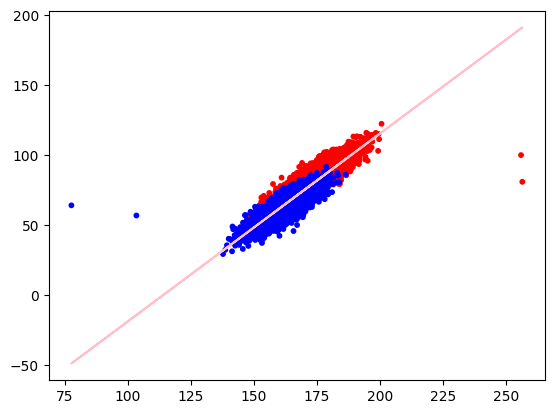

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Height.reshape(-1, 1), Weight)
print('W1 : ', reg.coef_[0])
print('W0 : ', reg.intercept_)
plt.scatter(Height, Weight, 10, c = colors)
Weight_pred = reg.coef_[0] * Height + reg.intercept_
plt.plot(Height, Weight_pred, color = 'pink')
plt.show()

In [61]:
numbers = np.size(Height)
w1 = (sum(Height * Weight) - 1 / numbers * sum(Height) * sum(Weight)) / (sum(np.square(Height)) - 1 / numbers * pow(sum(Height), 2))
print('w1 Cong thuc slide 9: ', w1)
w0 = 1/ numbers * sum(Weight) - w1 * 1/ numbers * sum(Height)
print('w0 Cong thuc slide 9: ', w0)


w1 Cong thuc slide 9:  1.344095834333103
w0 Cong thuc slide 9:  -153.35198605890014


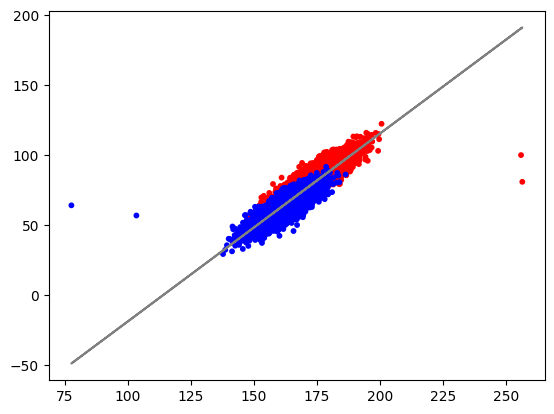

In [62]:
Weight_pls = w1 * Height + w0
plt.scatter(Height, Weight, 10, c = colors)
plt.plot(Height, Weight_pls, color = 'gray')
plt.show()

In [91]:
Weight_e = np.abs(Weight - Weight_pls)
Weight_eSort = np.sort(Weight_e)[::-1]
print(Weight_eSort[:numbers // 10])

[113.06219875 110.34784232  90.56345564  71.15284363  23.65125805
  21.22955643  20.90265081  20.87678585  20.49636051  19.58655224
  19.21451706  18.74034798  17.45969154  17.45648903  17.38350698
  17.29084254  17.03258047  16.97494433  16.92359569  16.84267854
  16.80212076  16.65798218  16.64289242  16.58684931  16.57781785
  16.50794856  16.36554965  16.28273976  16.25355848  16.23481728
  16.23399099  16.1447809   16.14078779  16.1397253   16.1058529
  16.08989917  16.06191359  16.0550938   16.05327835  16.03462346
  15.96761296  15.96753235  15.840615    15.78669227  15.69335939
  15.64349186  15.62374921  15.61014035  15.56846133  15.56075643
  15.5594357   15.53818935  15.51775079  15.38580554  15.35325167
  15.3526953   15.29487276  15.29261932  15.28718513  15.25265306
  15.19545877  15.08502045  15.08159082  15.0629308   15.03387821
  14.97757421  14.97301967  14.92323771  14.92017452  14.85999037
  14.85942678  14.85586577  14.82231973  14.79636316  14.78630587
  14.763307

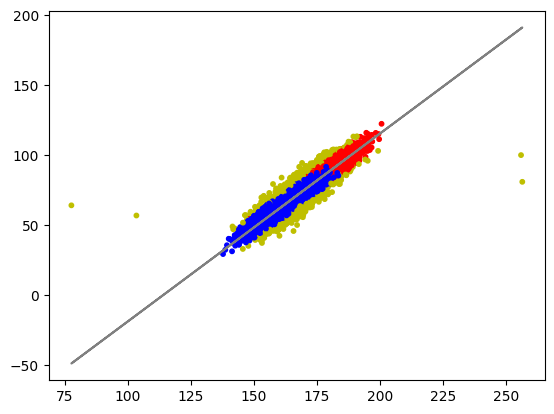

In [92]:
for index in range(numbers):
    Check = abs(Weight[index] - Weight_pls[index])
    for indexSort in range(numbers // 10):
        if Check == Weight_eSort[indexSort]:
            colors[index] = 'y'
plt.scatter(Height, Weight, 10, c = colors)
plt.plot(Height, Weight_pls, color = 'gray')
plt.show()
